In [1]:
# imports
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster

# local imports
from dbscan import DBScan


In [2]:
# two circles data
n_samples = 1000
data, labels = datasets.make_circles(n_samples=n_samples,
                        factor=.5,
                        noise=.05)
df = pd.DataFrame(data = data, columns=['x', 'y'])
df['data'] = ''
for i in range(len(df)):
    df['data'][i] = (df['x'][i], df['y'][i])

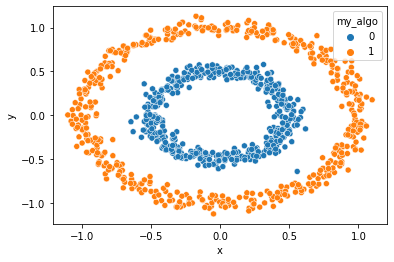

In [3]:
# my algorithm
model = DBScan(.1, 3)
model.fit(df['data'].tolist())
df['my_algo'] = df['data'].apply(lambda x: model.predict(x))
df.head()
sns.scatterplot(data=df, x='x', y='y', hue='my_algo');

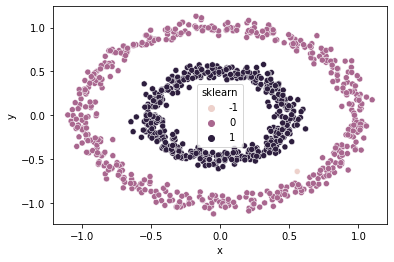

In [4]:
# sklearn algoirithm
model = cluster.DBSCAN(.1, 3)
model.fit(df['data'].tolist())
df['sklearn'] = model.labels_
sns.scatterplot(data=df, x='x', y='y', hue='sklearn');

In [5]:
# using half moon data
n_samples = 1000
data, labels = datasets.make_moons(n_samples=n_samples)
df = pd.DataFrame(data = data, columns=['x', 'y'])
df['data'] = ''
for i in range(len(df)):
    df['data'][i] = (df['x'][i], df['y'][i])

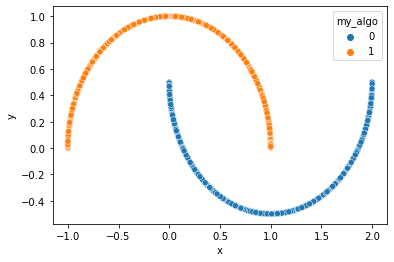

In [6]:
# my algorithm
model = DBScan(.1, 3)
model.fit(df['data'].tolist())
df['my_algo'] = df['data'].apply(lambda x: model.predict(x))
df.head()
sns.scatterplot(data=df, x='x', y='y', hue='my_algo');

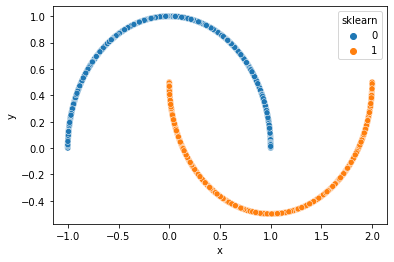

In [7]:
# sklearn algorithm
model = cluster.DBSCAN(.1, 3)
model.fit(df['data'].tolist())
df['sklearn'] = model.labels_
sns.scatterplot(data=df, x='x', y='y', hue='sklearn');